In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [123]:
df= pd.read_csv("C:/Users/Welcome/Downloads/product_segmentation_dataset (1).csv")

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product Category         347 non-null    object 
 1   Price (USD)              347 non-null    float64
 2   Average Customer Rating  347 non-null    float64
 3   Units Sold               347 non-null    int64  
 4   Stock Level              347 non-null    int64  
 5   Discount Offered (%)     347 non-null    float64
 6   Product Warranty         347 non-null    object 
 7   Return Rate (%)          347 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 21.8+ KB


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price (USD),347.0,1144.086628,610.083179,126.78,596.475,1050.02,1823.570,2000.00
Average Customer Rating,347.0,3.063977,1.190472,1.00,2.000,3.20,4.100,5.00
Units Sold,347.0,200.043228,14.002513,152.00,191.000,200.00,210.000,242.00
Stock Level,347.0,50.020173,28.620744,0.00,30.000,50.00,69.500,131.00
Discount Offered (%),347.0,25.087810,14.858688,0.01,12.675,24.83,38.415,49.89
Return Rate (%),347.0,10.203112,5.560203,0.04,5.875,10.27,14.900,19.93


In [127]:
df.select_dtypes(include = "object").head()

,Product Category,Product Warranty
0,Desk,Yes
1,Bed,Yes
2,Cabinet,Yes
3,Desk,Yes
4,Sofa,Yes


In [128]:
df['Product Category'].value_counts()

Product Category
Bed          62
Chair        56
Desk         54
Sofa         50
Bookshelf    44
Table        42
Cabinet      39
Name: count, dtype: int64

In [134]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X= ss.fit_transform(df.select_dtypes(include = 'number'))
cr = [] 

In [135]:
r= range(1,10)
for i in r:
    clus = KMeans(i)
    clus.fit(X)
    cr.append(clus.inertia_)
    
len(cr)

9

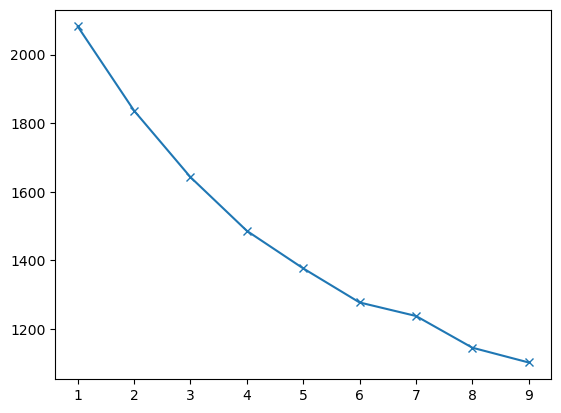

In [136]:
plt.plot(r,cr,marker = "x")

In [150]:
cluster = KMeans(4)
cluster.fit(X)
df['Clust_id']= cluster.labels_
df.head()

,Product Category,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Product Warranty,Return Rate (%),Clust_id
0,Desk,568.06,3.9,199,38,43.85,Yes,1.42,2
1,Bed,1332.68,4.4,185,41,47.20,Yes,6.26,0
2,Cabinet,1334.05,4.3,212,54,7.44,Yes,18.71,0
3,Desk,731.02,2.6,216,61,23.13,Yes,17.01,2
4,Sofa,752.33,3.7,205,104,49.05,Yes,19.64,2


In [151]:
df.select_dtypes(include='number').groupby("Clust_id").agg("mean").reset_index()

,Clust_id,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Return Rate (%)
0,0,1577.991895,4.135789,204.473684,53.442105,25.706211,8.016316
1,1,881.481266,2.003797,205.506329,58.848101,23.215823,5.840759
2,2,663.937264,3.586792,195.858491,45.669811,28.151038,13.094151
3,3,1598.126269,1.967164,193.940299,41.641791,21.571940,13.873582


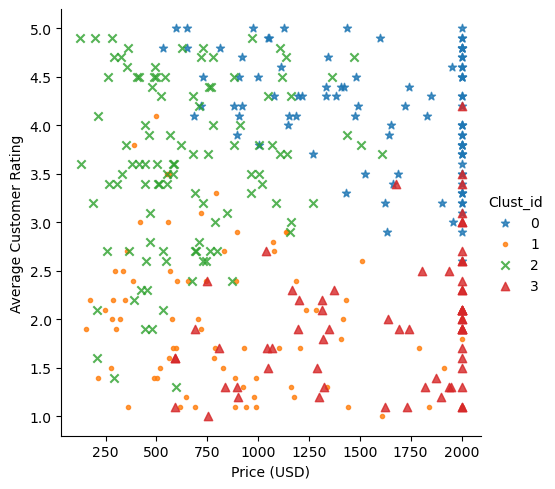

In [181]:

sns.lmplot(data = df,y="Average Customer Rating",x="Price (USD)",hue='Clust_id',fit_reg=False,markers = ["*",".","x","^"])

In [149]:
sns.lmplot(data = df,y="Return Rate (%)",x="Average Customer Rating",hue='Clust_id',fit_reg=False,markers = ["*",".","x","^"])

3

In [188]:
c3 = df[df['Clust_id']==0]
c3=c3.drop("Product Warranty",axis="columns")
c3.groupby("Product Category").agg("mean")
#In cluster 0 the average customer rating and spend is very high indicating very satisfied customers
#They purchase premium products. The rate of return is low.



,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Return Rate (%),Clust_id
Product Category,,,,,,,
Bed,1587.441905,4.147619,208.428571,55.428571,24.897143,7.553333,0.0
Bookshelf,1509.939091,4.127273,208.090909,52.909091,27.574545,7.319091,0.0
Cabinet,1642.602727,3.872727,204.636364,46.090909,20.460000,9.972727,0.0
Chair,1574.792778,4.105556,203.555556,56.666667,26.345000,7.001667,0.0
Desk,1309.118333,4.366667,203.000000,45.333333,28.135833,7.957500,0.0
Sofa,1699.032000,4.010000,204.500000,54.700000,27.372000,9.254000,0.0
Table,1737.415000,4.283333,196.916667,59.416667,25.442500,8.221667,0.0


In [175]:
c3 = df[df['Clust_id']==1]
c3=c3.drop("Product Warranty",axis="columns")
c3.groupby("Product Category").agg("mean")
#In cluster 1 the average customer rating is very poor and customer spends on mid-budget furnitures.
#The rate of return is less in this segment



,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Return Rate (%),Clust_id
Product Category,,,,,,,
Bed,847.768824,2.176471,203.529412,58.705882,17.968824,6.601765,1.0
Bookshelf,947.085833,2.175000,206.750000,73.916667,25.153333,5.909167,1.0
Cabinet,426.640000,2.471429,206.142857,52.000000,31.068571,3.527143,1.0
Chair,1094.175000,1.680000,208.300000,38.100000,26.450000,6.818000,1.0
Desk,876.522667,1.933333,205.600000,63.666667,24.412667,6.020000,1.0
Sofa,887.596000,1.650000,201.800000,69.200000,19.859000,6.718000,1.0
Table,988.486250,1.950000,208.250000,46.500000,22.497500,3.491250,1.0


In [185]:
c3 = df[df['Clust_id']==2]
c3=c3.drop("Product Warranty",axis="columns")
c3.groupby("Product Category").agg("mean")
#In cluster 3 the average customer rating average and customer spends on budget furnitures.


,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Return Rate (%),Clust_id
Product Category,,,,,,,
Bed,671.001818,3.618182,195.727273,47.727273,32.479091,11.823636,2.0
Bookshelf,642.783750,3.637500,197.500000,48.187500,33.811875,14.290625,2.0
Cabinet,674.479091,2.990909,192.818182,47.636364,30.776364,13.205455,2.0
Chair,765.859375,3.506250,195.250000,46.187500,28.596250,13.746250,2.0
Desk,627.908571,3.895238,197.523810,47.000000,21.122381,12.762381,2.0
Sofa,610.282500,3.615000,197.350000,48.150000,23.848500,14.259500,2.0
Table,695.185455,3.554545,191.636364,30.181818,33.557273,10.079091,2.0


In [186]:
c3 = df[df['Clust_id']==3]
c3=c3.drop("Product Warranty",axis="columns")
c3.groupby("Product Category").agg("mean")
#This group purchases premium products and yet the  rate of return is high and ratings are very poor.

,Price (USD),Average Customer Rating,Units Sold,Stock Level,Discount Offered (%),Return Rate (%),Clust_id
Product Category,,,,,,,
Bed,1782.607692,2.169231,193.230769,41.153846,24.880769,13.702308,3.0
Bookshelf,1979.708000,2.500000,190.200000,25.200000,17.358000,14.984000,3.0
Cabinet,1568.771000,2.010000,193.900000,43.500000,20.258000,13.325000,3.0
Chair,1603.397500,1.933333,191.166667,37.833333,17.495833,13.290833,3.0
Desk,1337.393333,1.750000,202.000000,50.500000,17.573333,13.898333,3.0
Sofa,1532.402000,1.900000,195.000000,41.500000,27.492000,13.745000,3.0
Table,1429.560000,1.663636,194.181818,47.454545,22.017273,14.809091,3.0


In [217]:
## For each questions the plots reprsent the Answers Visually
#How can FurniMart use clustering analysis to optimize its marketing spend and better
#target product segments? What data would be most relevant for this analysis?

## K-Means clustering was performed and 4 clusters were formed on the basis of average price paid,Average customer rating.





#Given the issue of high return rates in certain product categories, what steps should
#FurniMart take to address this problem? How can clustering help identify products that
#need quality improvement or better customer targeting?

## Clusters 1,3 have a very poor perception and they are not satisfied with the product. Hence their pain points need to be understood.
## Clustering has helped to identify the poor customer rating for both premium and bugdet products.
### sns.boxplot(x= 'Clust_id', y = 'Average Customer Rating',hue='Clust_id',data = df) 


#What insights could FurniMart gain from a more detailed understanding of its inventory
#management system? How might clustering help the company better align stock levels with demand?
###sns.boxplot(x= 'Clust_id', y = 'Stock Level',hue='Product Category',data = df)
## This boxplot indicates that the cluster has not identified any significant difference in the stock level

#How should FurniMart approach its pricing strategy based on the clustering of its product
#portfolio? Should certain product segments be priced higher or lower, and why?
###sns.boxplot(x= 'Clust_id', y = 'Price (USD)',hue='Product Category',data = df)
## The plot indicates that price does not matter and has no overall effect.

#Looking forward, what additional data points could FurniMart incorporate into its analysis
#to stay competitive? How might changes in consumer preferences or new product
#categories affect its segmentation strategy?

## In order to stay competitive they must improve product quality and eliminate products with poor customer rating and high return rate.




<Axes: xlabel='Clust_id', ylabel='Price (USD)'>

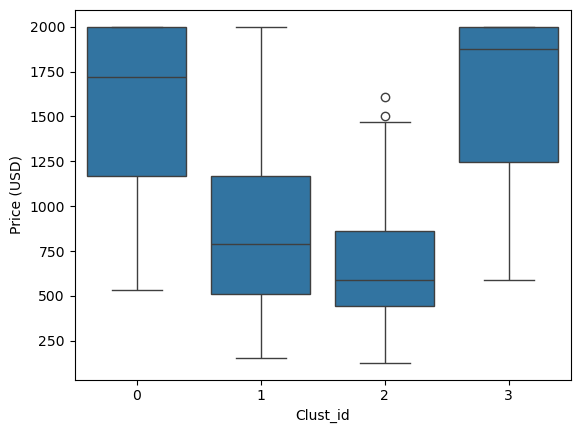

In [208]:
sns.boxplot(x= 'Clust_id', y = 'Price (USD)',data = df)

<Axes: xlabel='Clust_id', ylabel='Average Customer Rating'>

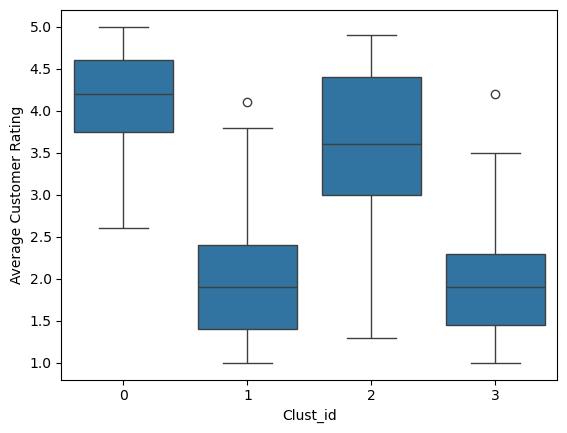

In [209]:
sns.boxplot(x= 'Clust_id', y = 'Average Customer Rating',data = df)

<Axes: xlabel='Clust_id', ylabel='Stock Level'>

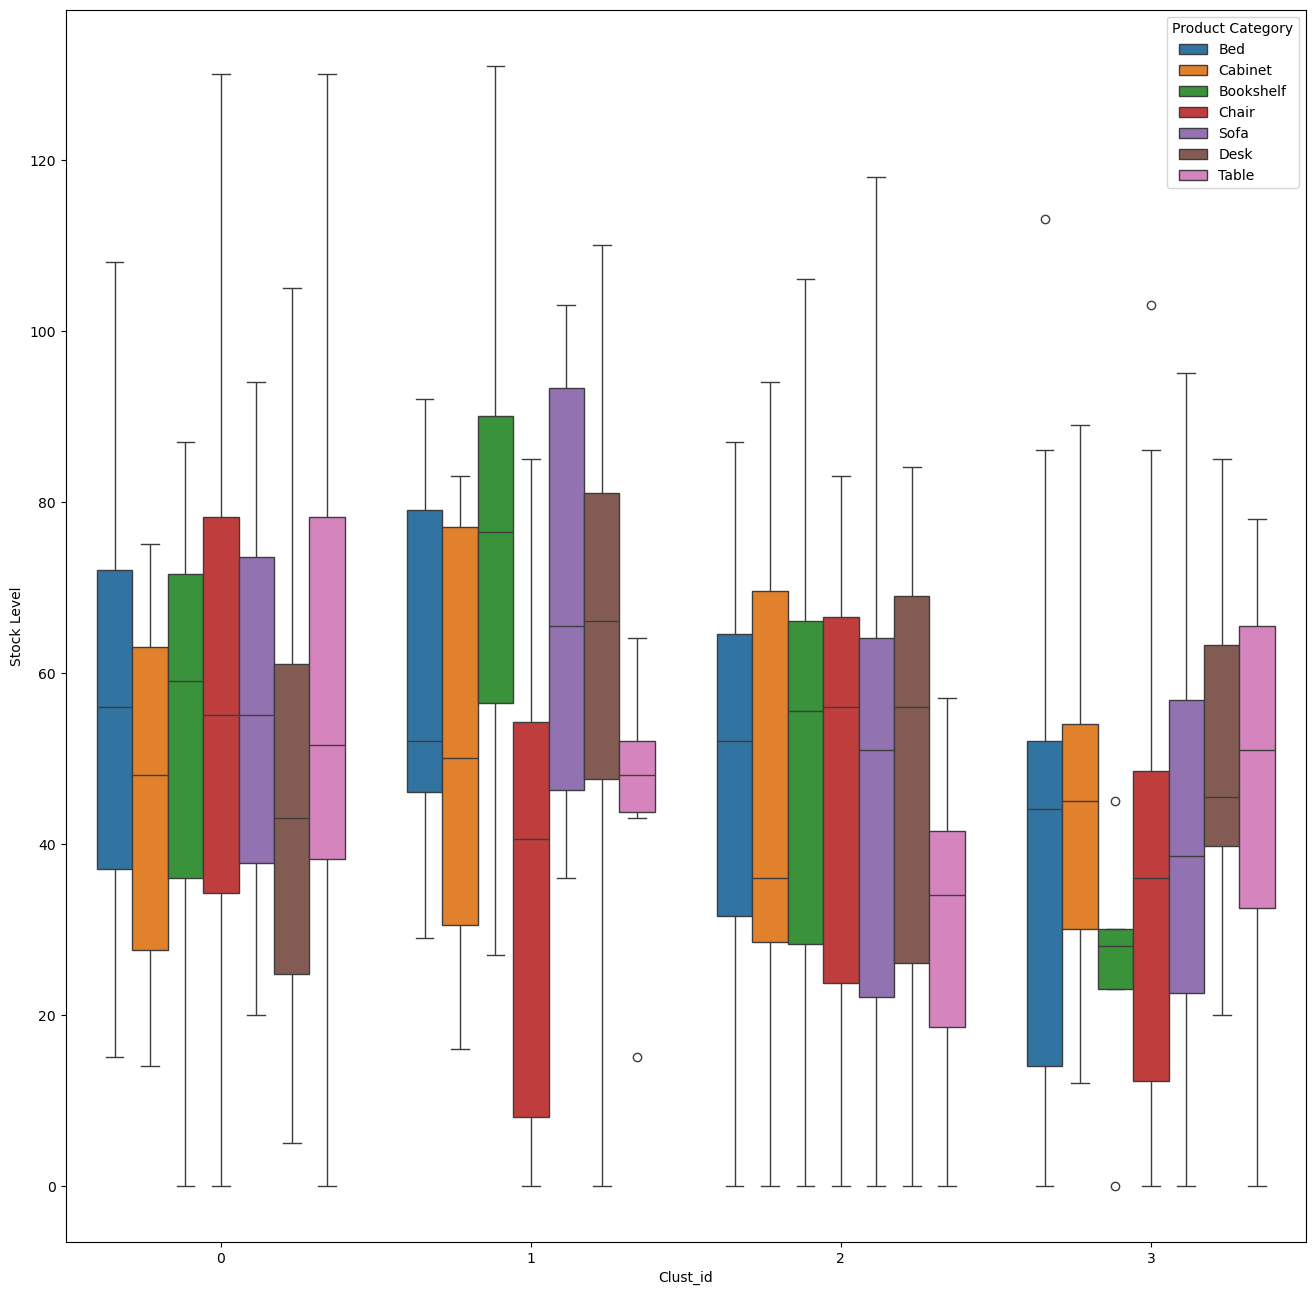

In [199]:
plt.figure(figsize = (16,16))
sns.boxplot(x= 'Clust_id', y = 'Stock Level',hue='Product Category',data = df)

<Axes: xlabel='Clust_id', ylabel='Price (USD)'>

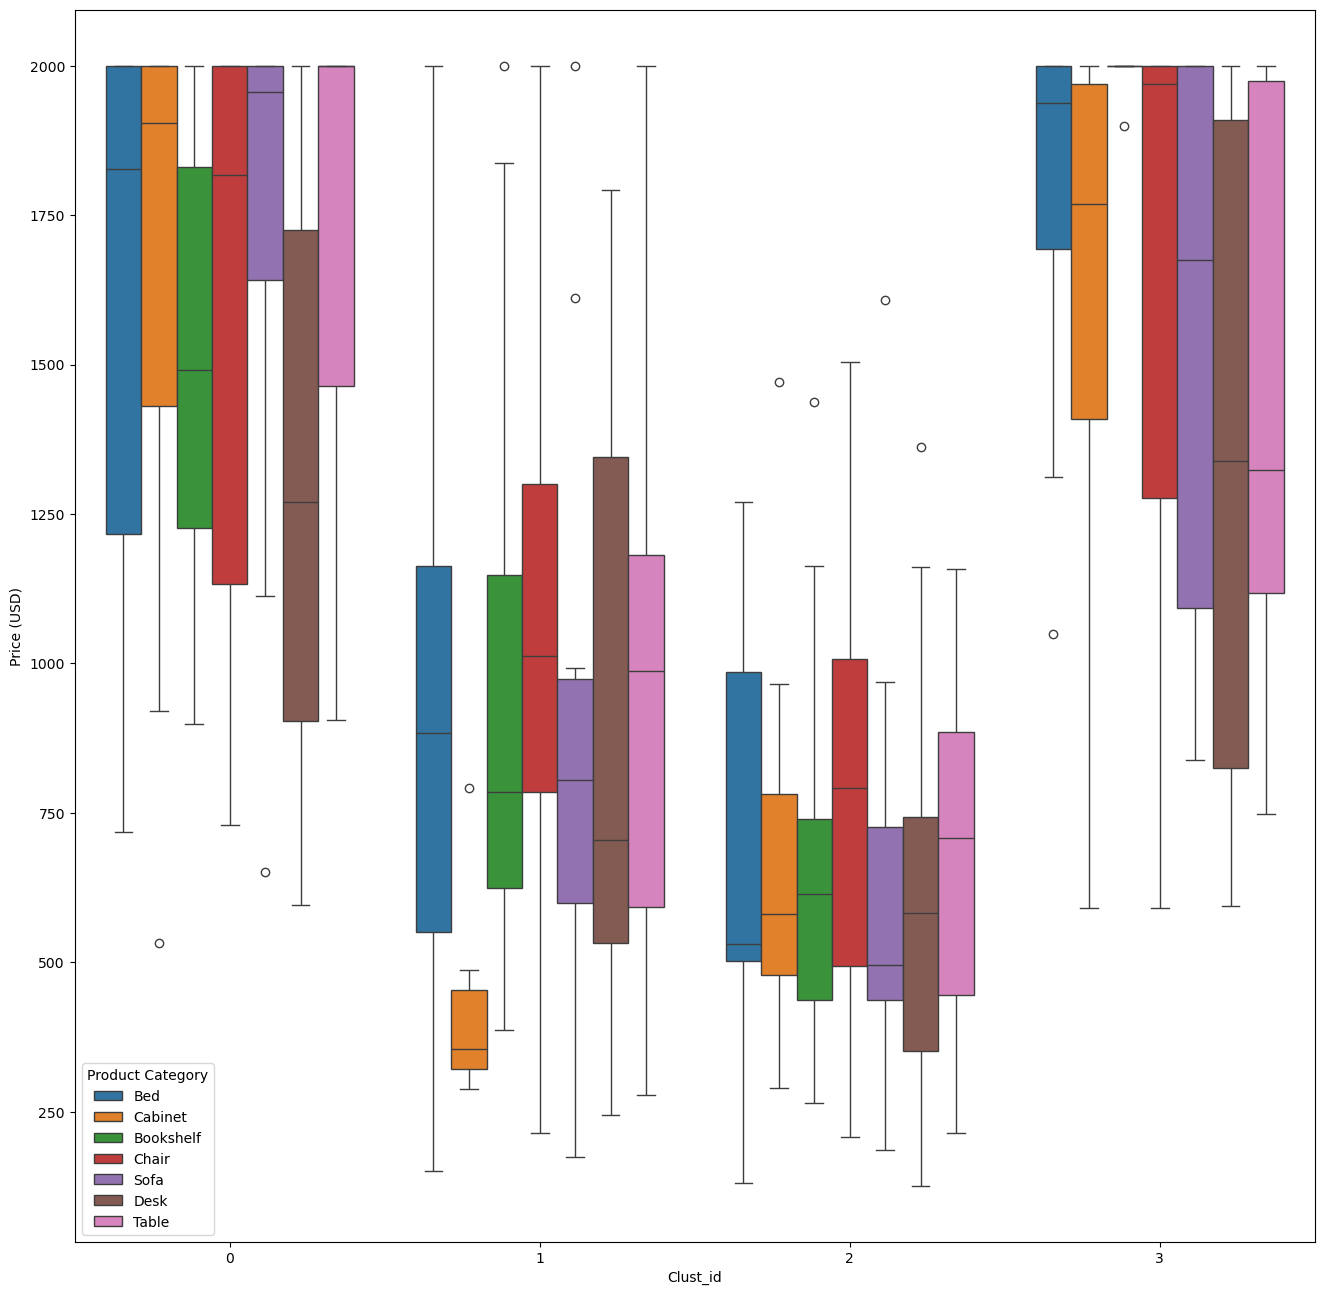

In [213]:
plt.figure(figsize = (16,16))
sns.boxplot(x= 'Clust_id', y = 'Price (USD)',hue='Product Category',data = df)


<Axes: xlabel='Product Warranty', ylabel='Average Customer Rating'>

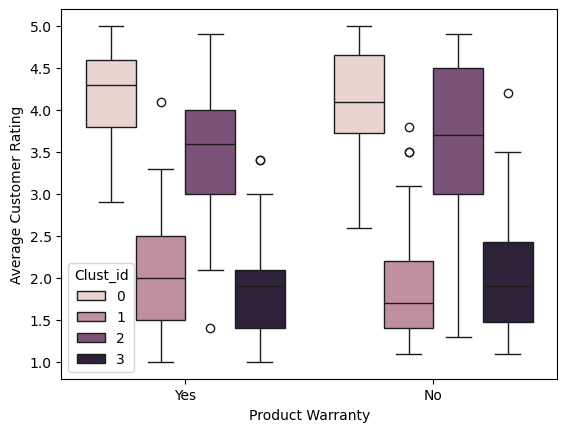

In [215]:
#Product warranty has no significant effect on customer ratings
sns.boxplot(x= 'Product Warranty', y = 'Average Customer Rating',hue='Clust_id',data = df)

<Axes: xlabel='Product Category', ylabel='Stock Level'>

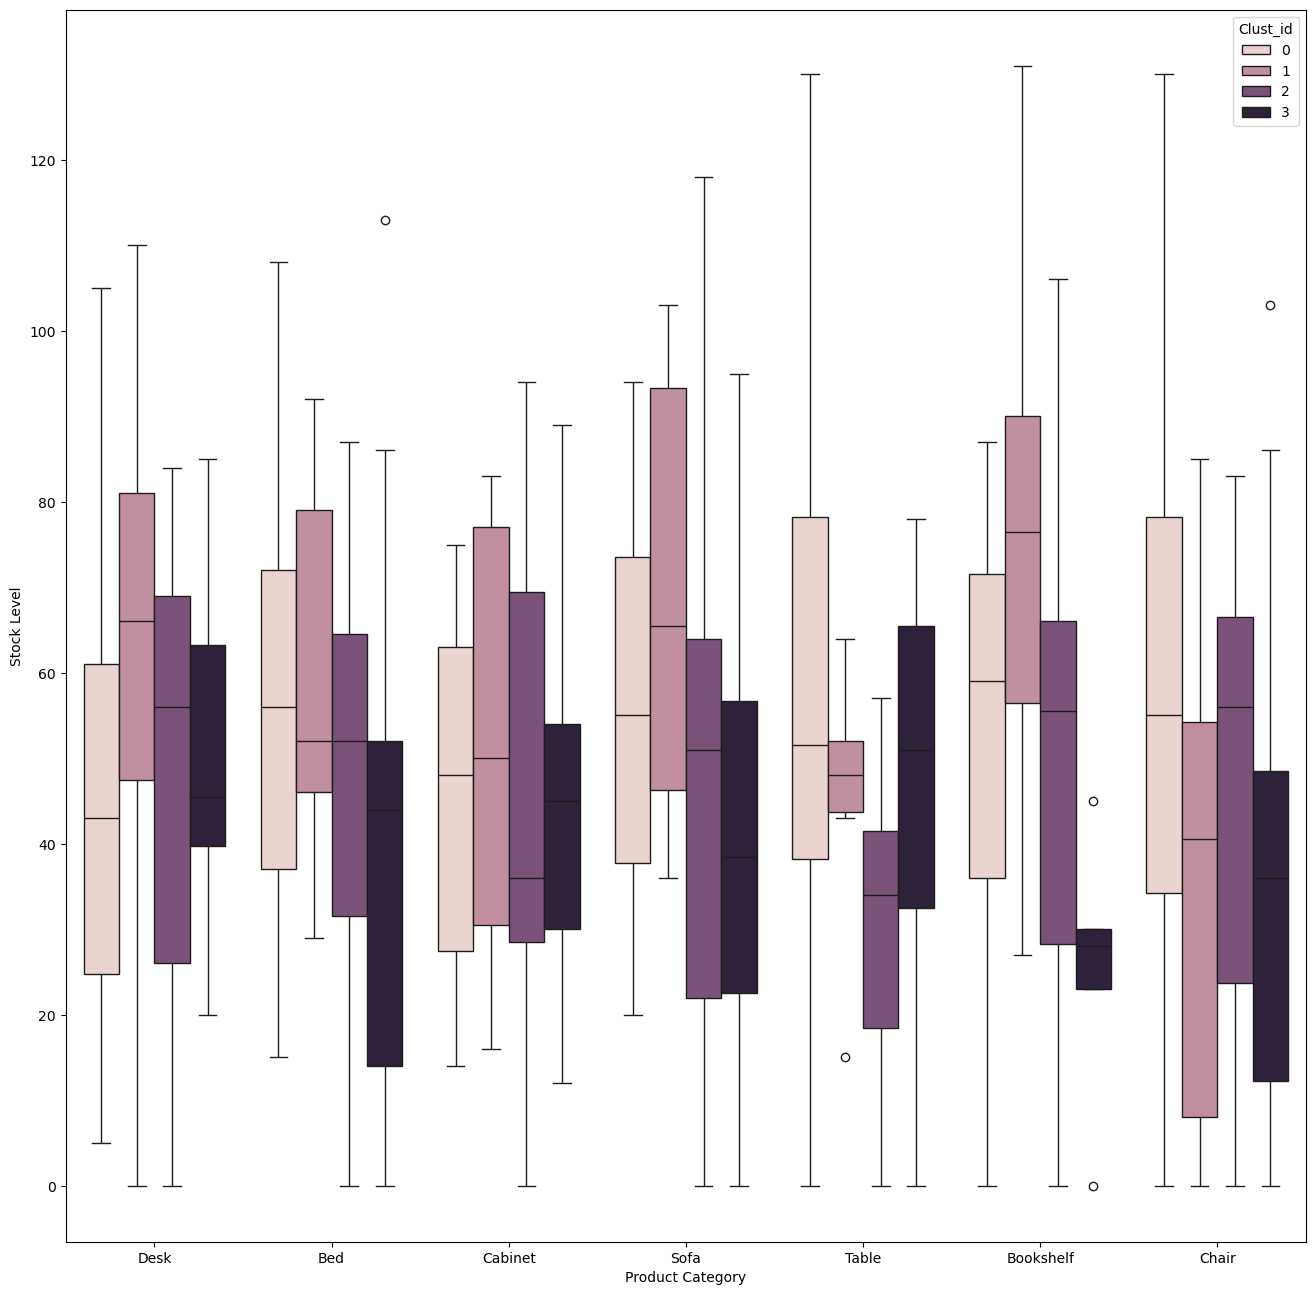

In [218]:
plt.figure(figsize = (16,16))
sns.boxplot(x= 'Product Category', y = 'Stock Level',hue='Clust_id',data = df)